In [1]:
import pandas as pd

In [2]:
#Download the Iris dataset
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

# Explore the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = data.drop(["Id"] , axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
import sklearn
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [7]:

data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [8]:

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
from sklearn.model_selection import train_test_split

In [10]:
data_x = data.drop(["Species"], axis = 1)
data_y = data.Species

In [11]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = .2, random_state = 0)

In [12]:
print(data_x_train.shape)
print(data_y_train.shape)
print(data_x_test.shape)
print(data_y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:

dt = DecisionTreeClassifier(criterion='gini' , max_depth=5)

In [16]:

dt.fit(data_x_train , data_y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
pred_dt = dt.predict(data_x_test)

In [18]:

from sklearn.metrics import confusion_matrix

In [19]:

table_dt = confusion_matrix(pred_dt , data_y_test)
table_dt

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [20]:
table_dt.diagonal().sum()

30

In [21]:
table_dt.sum()

30

In [22]:

acc = table_dt.diagonal().sum() / table_dt.sum() * 100
acc

100.0

In [25]:

from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [27]:

from sklearn import tree
import graphviz

In [28]:
data_x_train_names = data_x_train.columns

In [29]:

dot_data = tree.export_graphviz(dt , out_file = None)
graph = graphviz.Source(dot_data)

In [30]:
import matplotlib.pyplot as plt

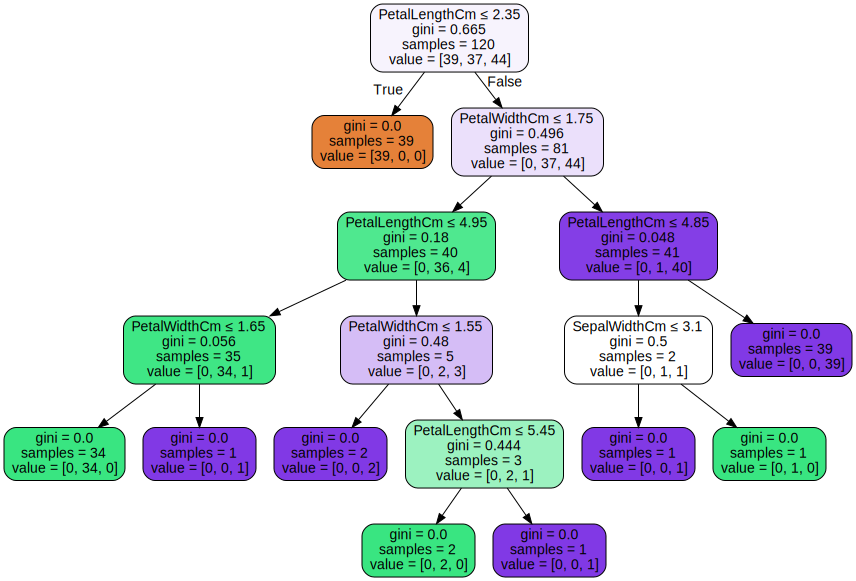

<Figure size 432x432 with 0 Axes>

In [31]:

fig = plt.figure(figsize = (6,6))
dot_data = tree.export_graphviz(dt , out_file= None,
                               feature_names=data_x_train_names,
                               filled= True, rounded = True,
                               special_characters= True)
graph = graphviz.Source(dot_data)
graph

In [32]:
dt1 = DecisionTreeClassifier(criterion='gini' , max_depth=5)

In [33]:
dt1.fit(data_x_test , data_y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
data_x_test_names = data_x_test.columns

In [35]:

dot_data1 = tree.export_graphviz(dt1 , out_file = None)
graph1 = graphviz.Source(dot_data1)

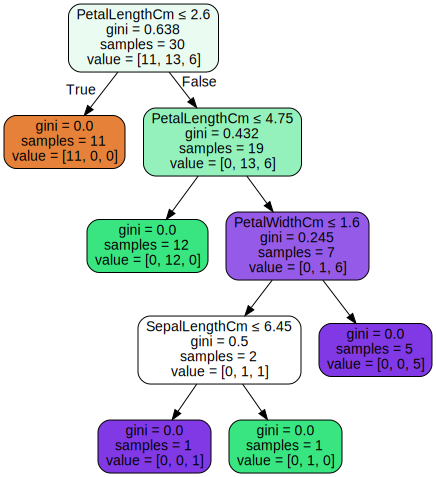

<Figure size 432x432 with 0 Axes>

In [36]:
fig = plt.figure(figsize = (6,6))
dot_data1 = tree.export_graphviz(dt1 , out_file= None,
                               feature_names=data_x_test_names,
                               filled= True, rounded = True,
                               special_characters= True)
graph1 = graphviz.Source(dot_data1)
graph1

In [37]:

from sklearn.ensemble import AdaBoostClassifier

In [38]:

abc = AdaBoostClassifier(DecisionTreeClassifier() , n_estimators= 15)

In [39]:

abc.fit(data_x_train , data_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [40]:
pred_boost = abc.predict(data_x_test)

In [41]:
tab_boost = confusion_matrix(pred_boost , data_y_test)
tab_boost

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [42]:
acc1 = tab_boost.diagonal().sum() / tab_boost.sum() * 100
acc1

100.0